<ipython-input-10-4005594637>:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"] = df["published_at"].dt.to_period("M").astype(str)
<ipython-input-10-4005594637>:37: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-4005594637>:37: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-4005594637>:37: UserWarning: Glyph 30041 (\N{CJK UNIFIED IDEOGRAPH-7559}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-4005594637>:37: UserWarning: Glyph 35328 (\N{CJK UNIFIED IDEOGRAPH-8A00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-4005594637>:37: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-4005594637>:37: UserWarning: Glyph 128200 (\N{CHART

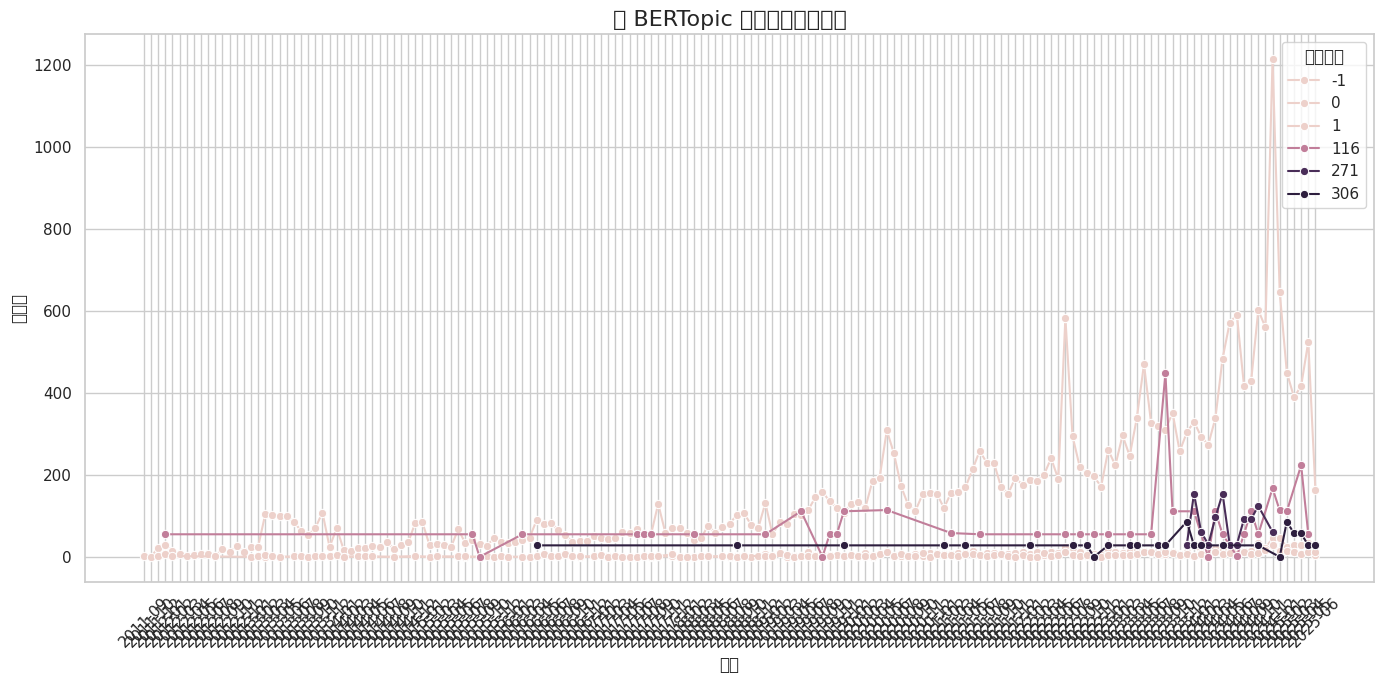

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設定圖形風格
sns.set(style="whitegrid")

# ⏫ 載入資料
comments_df = pd.read_csv("1.2_jay_comments_clean.csv")
bertopic_df = pd.read_csv("2.1_BerTopic_jay_bertopic_topic_result.csv")

# 🔁 合併
df = pd.merge(comments_df, bertopic_df, on="text_cleaned", how="inner")

# ⏱ 修正 published_at 欄位（用 comments 的）
df["published_at"] = pd.to_datetime(df["published_at_x"], errors="coerce")

# 🗓 加入年月欄位
df["year_month"] = df["published_at"].dt.to_period("M").astype(str)

# 📊 統計主題在每月出現次數
topic_time_df = df.groupby(["bertopic_topic", "year_month"]).size().reset_index(name="count")

# 🔝 選前 N 熱門主題
top_N = 6
top_topics = df["bertopic_topic"].value_counts().head(top_N).index.tolist()
filtered_df = topic_time_df[topic_time_df["bertopic_topic"].isin(top_topics)]

# 📈 畫主題時間變化圖
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_df, x="year_month", y="count", hue="bertopic_topic", marker="o")
plt.title("📈 BERTopic 主題熱度時間趨勢", fontsize=16)
plt.xlabel("年月")
plt.ylabel("留言數")
plt.xticks(rotation=45)
plt.legend(title="主題編號")
plt.tight_layout()
plt.show()


<ipython-input-12-411248163>:31: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


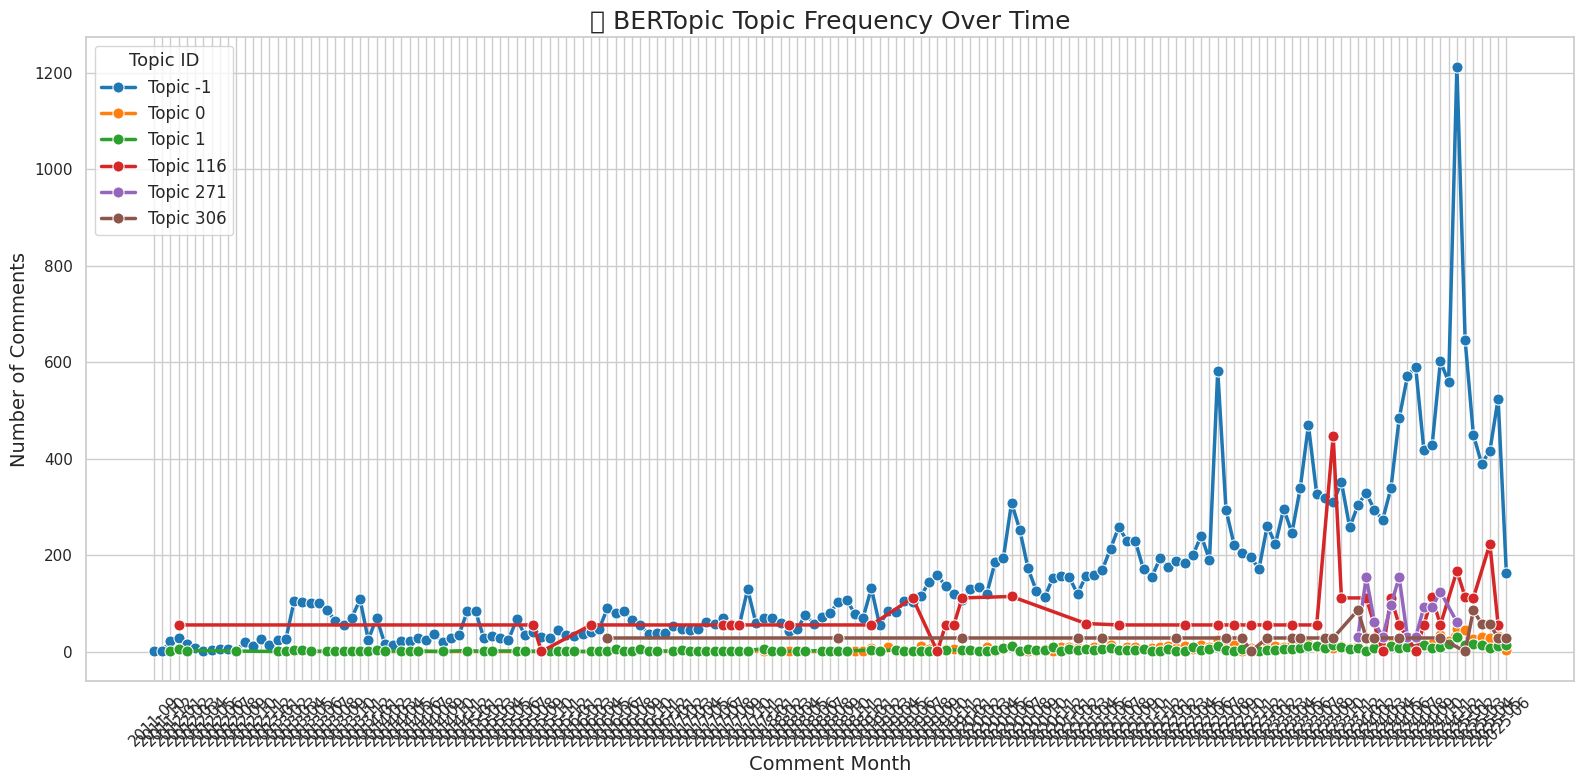

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用高對比色彩（可選 "tab10", "husl", "Set2", "Paired" 等）
palette = sns.color_palette("tab10", n_colors=top_N)

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

sns.lineplot(
    data=filtered_df,
    x="year_month",
    y="count",
    hue="bertopic_topic",
    palette=palette,
    linewidth=2.5,
    marker="o",
    markersize=8
)

plt.title("📈 BERTopic Topic Frequency Over Time", fontsize=18)
plt.xlabel("Comment Month", fontsize=14)
plt.ylabel("Number of Comments", fontsize=14)
plt.xticks(rotation=45)

# Update legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = [f"Topic {label}" for label in labels]
plt.legend(handles, labels, title="Topic ID", fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()


In [13]:
# 讀取資料（如果還沒做）
import pandas as pd

bertopic_df = pd.read_csv("2.1_BerTopic_jay_bertopic_topic_result.csv")

# 只看 topic -1, 116, 271
target_topics = [-1, 116, 271]
filtered_topics = bertopic_df[bertopic_df["bertopic_topic"].isin(target_topics)]

# 顯示每個 topic 各自前 10 筆留言（可調整）
for topic_id in target_topics:
    print(f"\n🧠 Topic {topic_id} - Example Comments:")
    examples = filtered_topics[filtered_topics["bertopic_topic"] == topic_id]["text"].head(10)
    for i, text in enumerate(examples, 1):
        print(f"{i}. {text}")



🧠 Topic -1 - Example Comments:
1. 青春时光机来一首可爱女人🌈
2. 没想到你对我念念不忘，跟你身边的美女不能比！
3. 今でもこの曲が大好き!!
思い出の曲です…
4. 所以才會有今生一見如故的感覺
5. 過了這麼這麼多年
這麼多偶像🤩倒下
還好我們杰倫挺住了
壞壞的讓我瘋狂的可愛杰倫🎉
6. wo 的一聲，一個新的時代音樂誕生，而在這新時代最頂端的是音樂帝王，周杰倫，
7. 一直觉得杰伦的颜值巅峰就是第一，二张专辑
8. 因為這個MV有徐諾萱才注意到周杰倫
9. 2028 還在聽.
10. Wow一哼我以為要唱可愛女人

🧠 Topic 116 - Example Comments:
1. 好聽
2. 好听
3. 好聽🎉🎉
4. 好聽💙
5. 好聽♥
6. 好聽👍👍👏👏
7. 好聽👍👍✌✌👏👏🎉🎉
8. 好聽👍👍✌✌🎊🎊
9. 好听❤
10. 好聽❤❤👏👏

🧠 Topic 271 - Example Comments:
1. 2024還在聽
2. 2024還在聽😊😊
3. 2024还在听
4. 2024还在听👍
5. 2024還在聽❤
6. 2024還在聽🙋
7. 2024還在聽😂
8. 2024還在聽的集合
9. 2024還在聽🙋🏻‍♂️
10. 2024还在听❤😢
